## 타이타닉 데이터 다운로드

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/titanic_train.csv'
train_df = pd.read_csv(file_path, sep=',')
train_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,NaN,"Devon, England Wichita, KS"
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,NaN,S,NaN,NaN
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN,NaN
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,NaN,S,NaN,"Cornwall / Hancock, MI"


총 916명의 승객에 대한 정보는 다음의 정보를 포함합니다.

1. pclass : 티켓 등급
2. survived : 생존 유무(생존=1, 죽음=0)
3. name : 승객 이름
4. sex : 성별
5. age : 나이
6. sibsp : 동승자 수(형제 또는 배우자)
7. parch : 동승자 수(부모 또는 자녀)
8. ticket : 티켓 번호
9. far : 티켓 요금
10. cabin : 선실 번호
11. embarked : 탑승 장소(선착장)

## 데이터를 정제하기 위해, 결측 값을 확인합니다

In [25]:
train_df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    2
dtype: int64

결측 값인 'NaN'이 age, cabin, body, home.dest에서 많이 발생합니다.   
age는 보류하고, cabin과 body, home.dest는 이번 분석에서 제외합니다. (생존과 연관이 거의 없기 때문에)

In [23]:
train_df=train_df.drop(['cabin','body','home.dest'], axis=1)
train_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,S
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,S
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,C
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,334914,7.7250,Q
...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,S
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,S
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,S


age 속성의 결측값을 채우는 과정을 진행합니다.  
여기서는 평균값을 계산하여 결측값을 채웁니다.


In [24]:
mean=train_df['age'].mean()
num=0
for i in train_df['age'] :
    if np.isnan(i) :
        train_df['age'][num]=mean
    num+=1
train_df['age']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0      13.000000
1       4.000000
2      30.000000
3      30.231444
4      22.000000
         ...    
911     0.170000
912    30.231444
913    30.231444
914    20.000000
915    32.000000
Name: age, Length: 916, dtype: float64

## 차트를 사용하여 생존과 각 데이터의 연관관계를 추측합니다

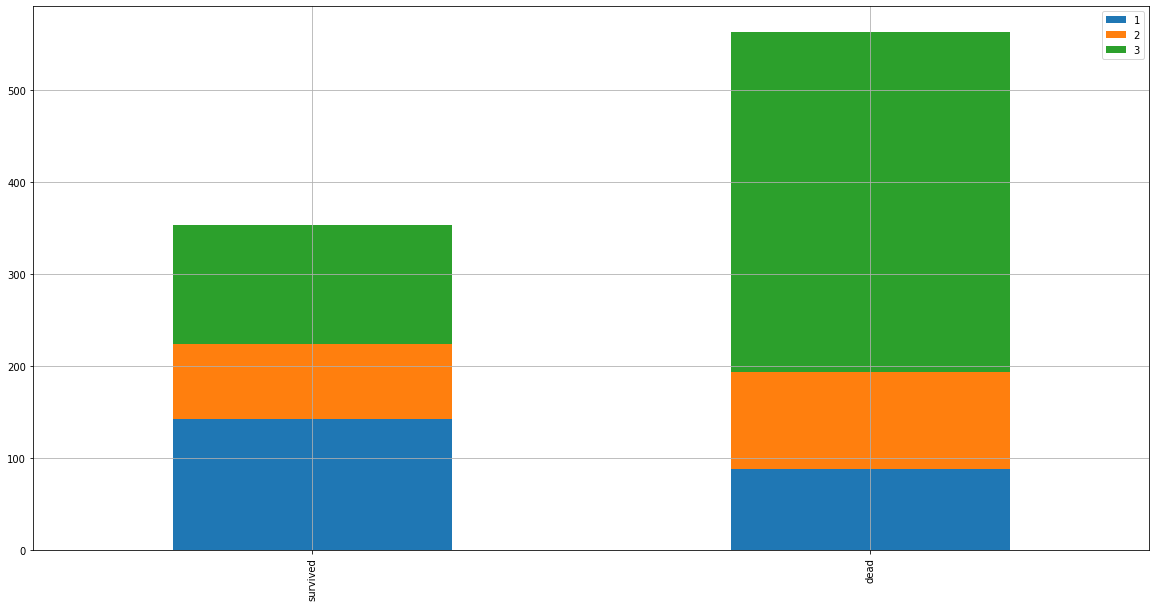

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    survived = train_df[train_df['survived']==1][feature].value_counts()
    dead = train_df[train_df['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar',stacked=True)

bar_chart('pclass')

1등석이 다른 등급에 비해 살아남은 비중이 높습니다.
1등석의 위치가 생존에 유리한 곳에 위치함을 추측 할 수 있습니다.

## 성별과의 관계

남성에 비해 여성이 많이 살았습니다.  
구조 시, 여성을 우선적으로 구조했을 것이라고 추측할 수 있습니다.

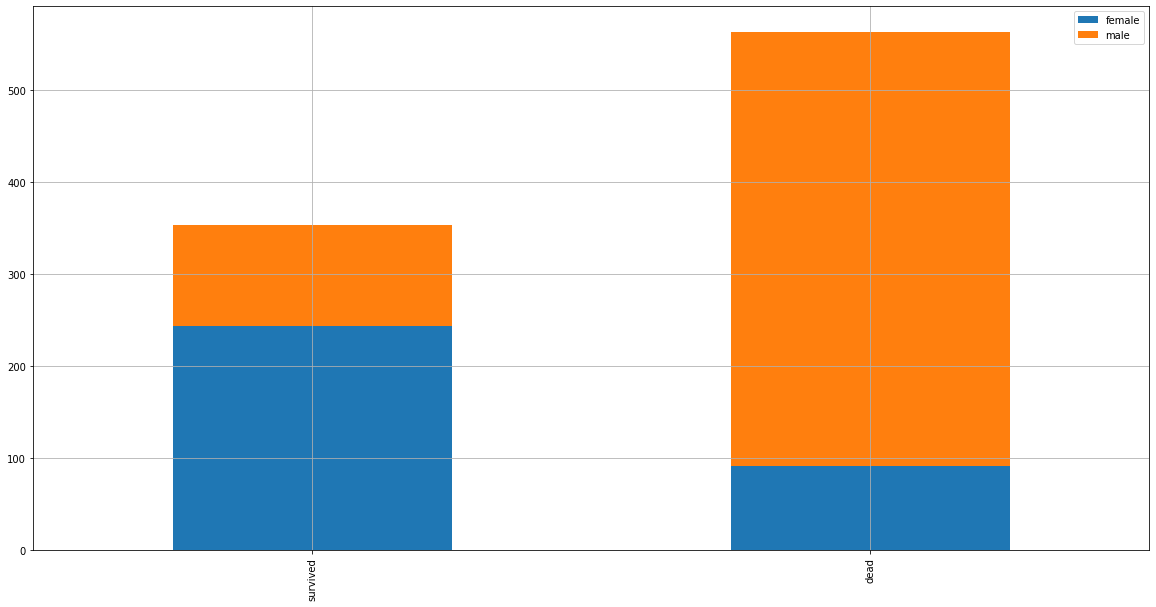

In [17]:
bar_chart('sex')

## 연령대(age)와의 관계

연령대는 구간별로 측정하여 시각화를 진행합니다.  
0 = 0-20살  
1 = 21-40살  
2 = 41-60살  
3 = 60-80살  
4 = 80살 이상  

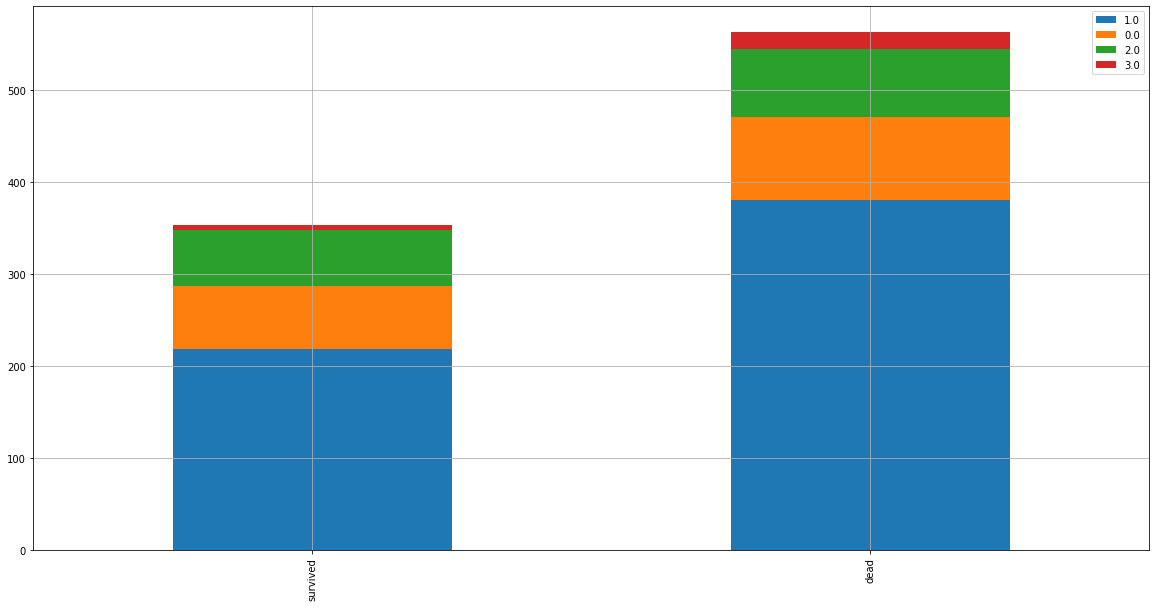

In [26]:
train_df.loc[train_df['age']<=20, 'age']=0
train_df.loc[(train_df['age']<=40)&(train_df['age']>20), 'age']=1
train_df.loc[(train_df['age']<=60)&(train_df['age']>40), 'age']=2
train_df.loc[(train_df['age']<=80)&(train_df['age']>60), 'age']=3
train_df.loc[train_df['age']>80, 'age']=4

bar_chart('age')

## 상관관계 분석

In [27]:
train_df.corr(method='pearson')

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.309735,-0.332608,0.073984,0.019397,-0.581359
survived,-0.309735,1.000000,-0.022401,-0.069888,0.061566,0.241467
age,-0.332608,-0.022401,1.000000,-0.162586,-0.106890,0.154959
sibsp,0.073984,-0.069888,-0.162586,1.000000,0.400843,0.179533
parch,0.019397,0.061566,-0.106890,0.400843,1.000000,0.252270
fare,-0.581359,0.241467,0.154959,0.179533,0.252270,1.000000


## 상관관계를 시각화 합니다 (heatmap).

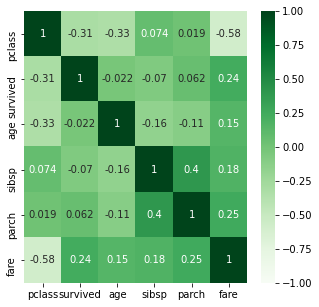

In [28]:
#heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(train_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )